In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x_train = np.array(
    [
        [34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644]
    ]
)
y_train = np.array([0., 0., 0., 1., 1.,])

In [19]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [20]:
def compute_cost(x, y, w, b, lambda_= 1):
    m, n = x.shape
    cost = 0
    for i in range(m):
        z = np.dot(x[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m
    return total_cost

In [21]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(x_train, y_train, test_w, test_b)
print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: 0.063


In [22]:
def compute_gradient(x, y, w, b, lambda_=None):
    m, n = x.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db, dj_dw

In [23]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(x)
    j_history = []
    w, b = w_in, b_in
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:
            cost =  cost_function(x, y, w, b, lambda_)
            j_history.append(cost)
    return w, b, j_history

In [24]:
def plot_cost_with_iterations(j_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
    ax1.plot(j_history[:100])
    ax2.plot(1000 + np.arange(len(j_history[1000:])), j_history[1000:])
    ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
    ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
    ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
    plt.show()

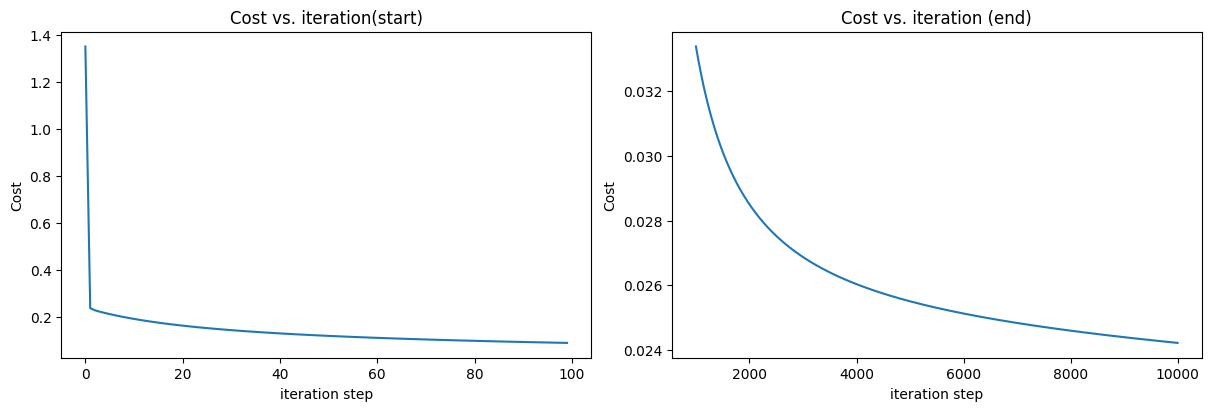

In [25]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8
iterations = 10000
alpha = 0.001
w, b, j_history = gradient_descent(x_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations, 1)
plot_cost_with_iterations(j_history)

In [26]:
def predict(x, w, b):
    m, n = x.shape
    p = np.zeros(m)
    for i in range(m):
        z_wb = np.dot(x[i],w)
        for j in range(n):
            z_wb += 0
        z_wb += b
        f_wb = sigmoid(z_wb)
        p[i] = 1 if f_wb>0.5 else 0
    return p

In [27]:
np.random.seed(1)
tmp_x = np.random.randn(4, 2) - 0.5
tmp_p = predict(tmp_x, w, b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 0. 0. 0.]
